In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


titanic_df = pd.read_csv('titanic.csv')

In [33]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
# Standardization

embark_map = {'S':1, 'C':2, 'Q':3}
titanic_df['Embarked'] = titanic_df['Embarked'].map(embark_map)
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(4)

titanic_df[['Last Name', 'First Name']] = titanic_df['Name'].str.split(',', expand=True)

gender_df = pd.get_dummies(titanic_df[['Sex']])
titanic_df = pd.concat([titanic_df, gender_df], axis=1)

titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

# Logistic Regression

The reason I'm choosing logistic regression for this is because it uses 0 and 1 values.
I want to predict if someone lives or dies, so I can use the surviving column (0,1) and
predict either a 0 or a 1.

In [35]:
# Logisitic Regression

X = titanic_df[['Sex_female','Sex_male', 'Age', 'SibSp', 'Parch', 'Embarked']]
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13,
                                                    stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [38]:
regression = LogisticRegression(random_state=13).fit(X_train, y_train)
y_predicted = regression.predict(X_test)
y_predicted

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0])

In [39]:
regression.score(X_test, y_test)

# This is a pretty good regression score

0.7821229050279329

(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0,
   np.float64(0.0),
   0.6114678006614971,
   np.float64(0.8064028994261552)),
  ('0', '1'): (0.0,
   np.float64(0.8097251585623677),
   0.6114678006614971,
   np.float64(0.19027484143763213)),
  ('1', '0'): (0.6164429250396065,
   np.float64(0.0),
   0.3835570749603936,
   np.float64(0.260002888920988)),
  ('1', '1'): (0.6164429250396065,
   np.float64(0.26332514805720064),
   0.3835570749603936,
   np.float64(0.7366748519427992))})

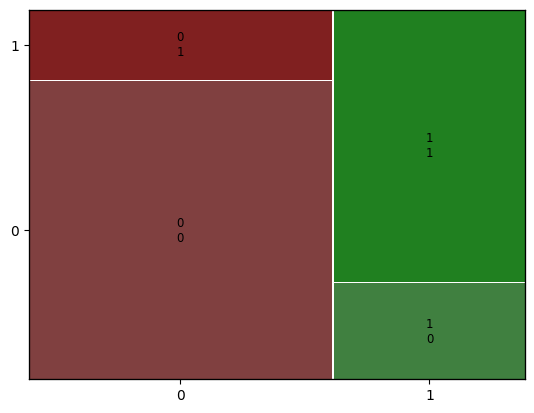

In [40]:
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_predicted)
mosaic(conf_matrix)

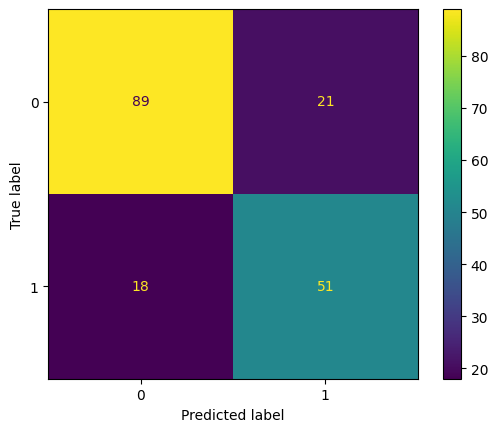

In [41]:
ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)

In [42]:
# This shows that there are way more true positive and true negative than false positive or negative

# If I also want to see the precision and recall, I can use the code we did in class today

def precision_and_recall(calc_type:str, tp: int, tn: int,
                        fp: int, fn: int) -> float:
    if calc_type == "precision":
        value = tp / (tp + fp)
        return value
    elif calc_type == "recall":
        value = tp / (tp + fn) 
        return value
    else:
        error_msg = "Please input correct integers."
        return error_msg

In [45]:
precision_and_recall("precision", 89, 51, 21,18)

0.8317757009345794

In [46]:
precision_and_recall("recall", 89, 51, 21, 18)

0.8317757009345794

These both have high scores, above 8. What this means that it is not only
giving correct results, but also it's doing that a lot more than the incorrect ones.